In [31]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

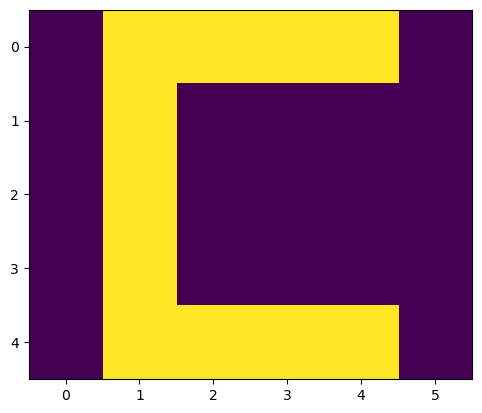

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting C.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

In [33]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [34]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 1 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [35]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 2.80448388e-01  2.46432218e-02  1.18077160e+00  6.33066555e-01
  -2.01328542e+00]
 [ 1.00639086e+00  5.44834531e-01  2.86519859e-02  3.93860196e-02
  -5.72554086e-01]
 [-8.06776984e-01 -1.98551145e+00 -7.52737597e-01 -1.14850982e+00
  -1.88722528e+00]
 [-1.39513316e+00  6.69021630e-01  3.72712912e-01  4.80619496e-01
  -4.48943291e-01]
 [ 3.29874079e-01 -1.50491892e+00 -4.08872477e-01  1.13551677e+00
   2.90844271e-01]
 [-1.59510834e+00 -8.30814342e-01  2.72254530e+00 -3.48385205e-01
  -1.84981003e+00]
 [ 1.31889651e-01  5.26230733e-01  1.19589990e-01  2.82711036e+00
   1.00250355e+00]
 [ 9.52170253e-01  6.34544091e-01  3.53207237e-02  1.55192275e+00
  -1.10436214e+00]
 [ 1.42602707e+00  1.30690118e+00 -9.00704976e-01 -5.01297714e-01
  -9.96296445e-01]
 [-3.91915288e-01  6.71855693e-01 -5.33787605e-01 -1.60300483e+00
   2.13087453e-01]
 [ 2.00758423e+00  4.50089080e-01  9.11203511e-02 -6.00295870e-02
   6.75070458e-02]
 [-1.38891452e+00 -1.05947293e+00  2.29526482e+00  9.46749050e-01

In [36]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc = []
    loss_values = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))  
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_values.append(sum(l) / len(x)) 
    return acc, loss_values, w1, w2
    
acc, loss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 67.41746161651008
epochs: 2 ======== acc: 71.2552936412646
epochs: 3 ======== acc: 74.06940673196702
epochs: 4 ======== acc: 76.08089026903535
epochs: 5 ======== acc: 77.53208709780381
epochs: 6 ======== acc: 78.6106595995121
epochs: 7 ======== acc: 79.44377649737065
epochs: 8 ======== acc: 80.11411428247276
epochs: 9 ======== acc: 80.67499880349155
epochs: 10 ======== acc: 81.16082678127815
epochs: 11 ======== acc: 81.59387089799236
epochs: 12 ======== acc: 81.98868539618562
epochs: 13 ======== acc: 82.35492682526375
epochs: 14 ======== acc: 82.69913554669625
epochs: 15 ======== acc: 83.02584976822904
epochs: 16 ======== acc: 83.3383003066185
epochs: 17 ======== acc: 83.63884623530366
epochs: 18 ======== acc: 83.92925162000229
epochs: 19 ======== acc: 84.2108646606111
epochs: 20 ======== acc: 84.48473630570167
epochs: 21 ======== acc: 84.75170069214242
epochs: 22 ======== acc: 85.01243098205755
epochs: 23 ======== acc: 85.26747896194668
epochs: 24 ======== acc:

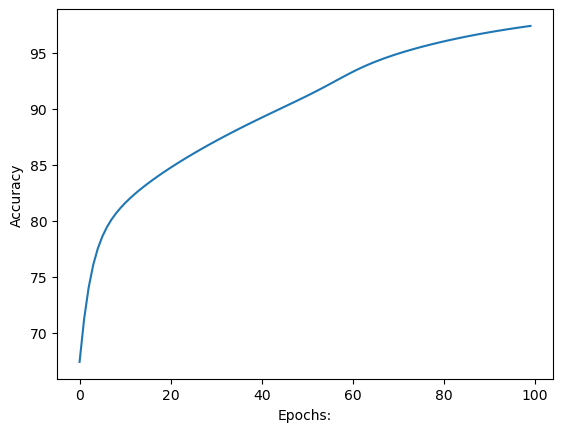

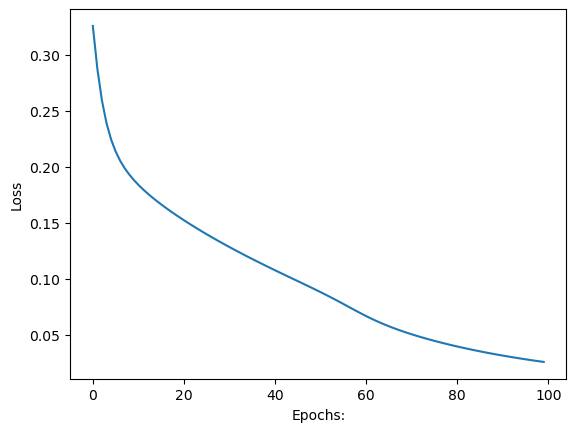

In [37]:
# plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

Image is of letter B.


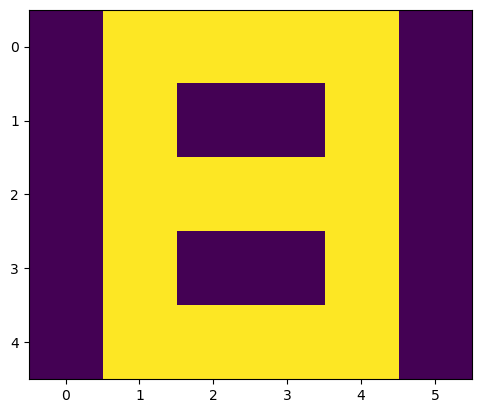

In [38]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[1], w1, w2)